In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import os
os.environ["WANDB_DISABLED"] = "true"

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bengali-news-summarization-dataset/Bengali-News-Summarization-Dataset/article.txt
/kaggle/input/bengali-news-summarization-dataset/Bengali-News-Summarization-Dataset/summary.txt


In [2]:
import numpy as np
import pandas as pd

# Exploratory Data Analysis (EDA)


In [3]:

# Load the dataset
with open("/kaggle/input/bengali-news-summarization-dataset/Bengali-News-Summarization-Dataset/article.txt", "r") as f:
    articles = f.read().splitlines()

with open("/kaggle/input/bengali-news-summarization-dataset/Bengali-News-Summarization-Dataset/summary.txt", "r") as f:
    summaries = f.read().splitlines()

# Create a DataFrame
df = pd.DataFrame(list(zip(articles, summaries)), columns=["article", "summary"])

# Display the first few rows
df.head()


,article,summary
0,স্ট্যান্ডার্ড চার্টার্ড ব্যাংকের নতুন প্রধান ন...,স্ট্যান্ডার্ড চার্টার্ডের নতুন সিইও আবরার
1,রাজধানী থেকে চামড়া শিল্পগুলো সাভারে স্থানান্তর...,মার্চের মধ্যে সাভারে চামড়া শিল্পের সিইটিপি: মন...
2,দেশীয় শিল্প বিকাশে সরকারের সব ধরনের উদ্যোগ অব্...,ওয়ালটন কারখানায় শিল্পমন্ত্রী
3,একীভূত হতে চলেছে অনলাইনে শ্রেণিবদ্ধ বিজ্ঞাপন স...,একীভূত হচ্ছে এখানেই ডটকমওএলএক্স
4,যাত্রীবাহী একটি বাসে আগুন দেওয়ার আধা ঘণ্টার মধ...,বাসে আগুন: নড়াইলের পৌর মেয়র গ্রেপ্তার


### Data Overview

In [4]:
# Check the shape of the dataset
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

# Check for missing values
print(df.isnull().sum())

# Check for duplicates
print(f"Number of duplicate rows: {df.duplicated().sum()}")


Dataset contains 19096 rows and 2 columns.
article    0
summary    0
dtype: int64
Number of duplicate rows: 21


### Removing Duplicate Rows


In [5]:
# Check for duplicates
duplicate_rows = df[df.duplicated()]
print(f"Number of duplicate rows: {len(duplicate_rows)}")

# Remove duplicates
df_cleaned = df.drop_duplicates()

# Verify if duplicates have been removed
print(f"Number of rows after removing duplicates: {df_cleaned.shape[0]}")


Number of duplicate rows: 21
Number of rows after removing duplicates: 19075


### Text Length Analysis


/tmp/ipykernel_36/2913932417.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['article_word_count'] = df_cleaned['article'].apply(lambda x: len(x.split()))
/tmp/ipykernel_36/2913932417.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['summary_word_count'] = df_cleaned['summary'].apply(lambda x: len(x.split()))
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf val

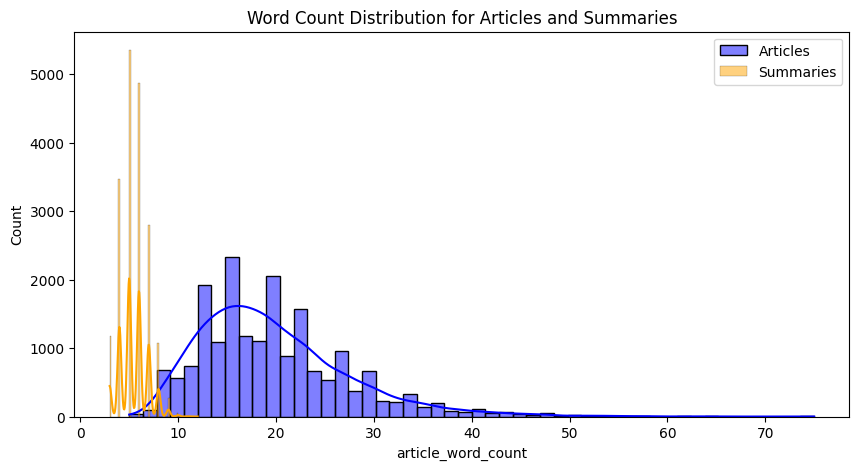

In [6]:
# Calculate word count for articles and summaries
df_cleaned['article_word_count'] = df_cleaned['article'].apply(lambda x: len(x.split()))
df_cleaned['summary_word_count'] = df_cleaned['summary'].apply(lambda x: len(x.split()))

# Plot distribution of word counts
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.histplot(df_cleaned['article_word_count'], bins=50, kde=True, color='blue', label='Articles')
sns.histplot(df_cleaned['summary_word_count'], bins=50, kde=True, color='orange', label='Summaries')
plt.legend()
plt.title('Word Count Distribution for Articles and Summaries')
plt.show()


/tmp/ipykernel_36/3764237258.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['article_length'] = df_cleaned['article'].apply(lambda x: len(x.split()))
/tmp/ipykernel_36/3764237258.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['summary_length'] = df_cleaned['summary'].apply(lambda x: len(x.split()))
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to N

Average article length: 19.6729750982962
Average summary length: 5.486657929226737


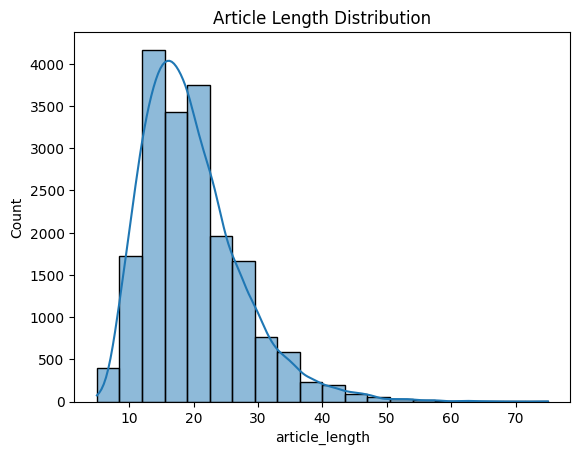

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


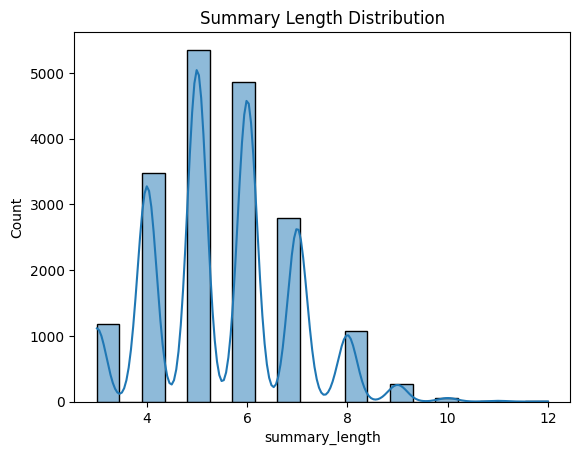

In [7]:

# Display basic statistics
df_cleaned.describe()

# Length of articles and summaries
df_cleaned['article_length'] = df_cleaned['article'].apply(lambda x: len(x.split()))
df_cleaned['summary_length'] = df_cleaned['summary'].apply(lambda x: len(x.split()))

# Print a summary of the lengths
print("Average article length:", df_cleaned['article_length'].mean())
print("Average summary length:", df_cleaned['summary_length'].mean())

# You can also visualize the length distribution using matplotlib or seaborn
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df_cleaned['article_length'], bins=20, kde=True)
plt.title("Article Length Distribution")
plt.show()

sns.histplot(df_cleaned['summary_length'], bins=20, kde=True)
plt.title("Summary Length Distribution")
plt.show()


In [8]:
# average length

avg_article_length = df_cleaned['article_word_count'].mean()
avg_summary_length = df_cleaned['summary_word_count'].mean()
print(f"Average Article Length: {avg_article_length} words")
print(f"Average Summary Length: {avg_summary_length} words")


Average Article Length: 19.6729750982962 words
Average Summary Length: 5.486657929226737 words


In [9]:
# Minimum and Maximum Length

min_article_length = df_cleaned['article_word_count'].min()
max_article_length = df_cleaned['article_word_count'].max()
min_summary_length = df_cleaned['summary_word_count'].min()
max_summary_length = df_cleaned['summary_word_count'].max()

print(f"Min/Max Article Length: {min_article_length} / {max_article_length} words")
print(f"Min/Max Summary Length: {min_summary_length} / {max_summary_length} words")


Min/Max Article Length: 5 / 75 words
Min/Max Summary Length: 3 / 12 words


In [10]:
# Comparison Between Articles and Summaries

df_cleaned['length_ratio'] = df_cleaned['article_word_count'] / df_cleaned['summary_word_count']
avg_length_ratio = df_cleaned['length_ratio'].mean()
print(f"Average Length Ratio (Article/Summary): {avg_length_ratio}")


Average Length Ratio (Article/Summary): 3.821676803609962


/tmp/ipykernel_36/2285627896.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['length_ratio'] = df_cleaned['article_word_count'] / df_cleaned['summary_word_count']


In [11]:
# Outliers 

outliers = df_cleaned[(df_cleaned['article_word_count'] > max_article_length * 0.95) | (df_cleaned['article_word_count'] < min_article_length * 1.05)]
print(f"Number of outliers: {outliers.shape[0]}")


Number of outliers: 20


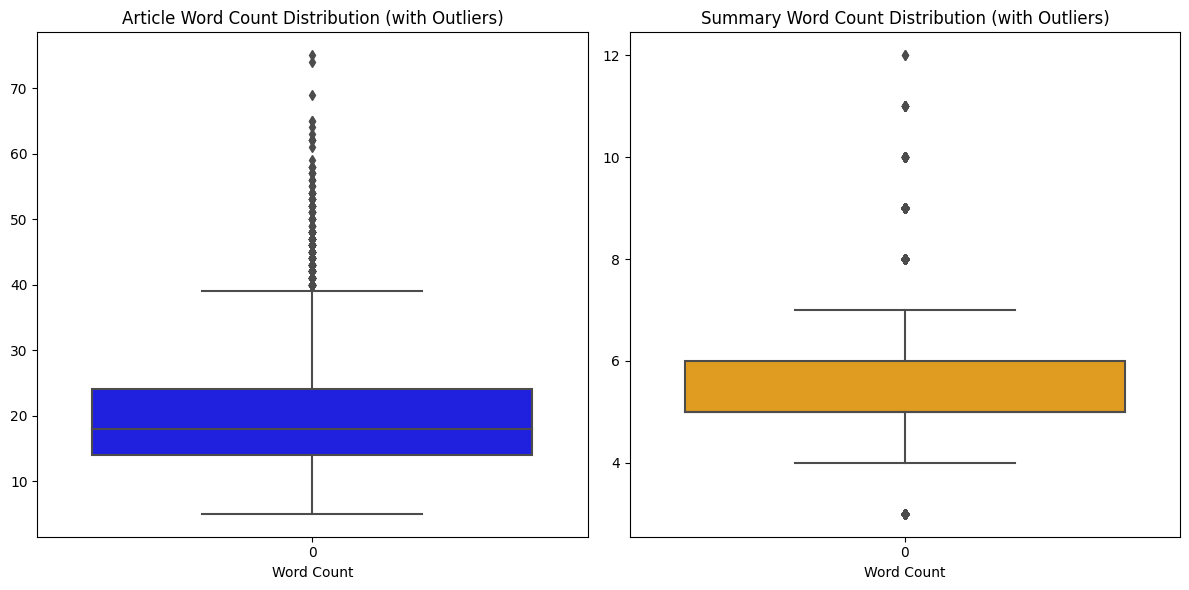

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plotting area
plt.figure(figsize=(12, 6))

# Plot boxplot for article word counts
plt.subplot(1, 2, 1)
sns.boxplot(df_cleaned['article_word_count'], color='blue')
plt.title('Article Word Count Distribution (with Outliers)')
plt.xlabel('Word Count')

# Plot boxplot for summary word counts
plt.subplot(1, 2, 2)
sns.boxplot(df_cleaned['summary_word_count'], color='orange')
plt.title('Summary Word Count Distribution (with Outliers)')
plt.xlabel('Word Count')

plt.tight_layout()
plt.show()


In [13]:
# Display the articles and summaries of the 20 outliers
outliers_articles_summaries = outliers[['article', 'summary']]
print(outliers_articles_summaries)


                                                 article  \
1016                          শেষ হল তাদের প্রথম ইভেন্ট।   
1798                         ওভেন ছাড়া কেক তৈরির পদ্ধতি।   
2277                       মৌসুমি সবজি দিয়ে মজার তরকারী।   
3050                       খবরটি প্রত্যাহার করা হল। বিস৤   
3149                        সত্যিই কি বাদামি চিনি উপকারী   
3831                     উশকোখুশকো চুল আছে ঘরোয়া সমাধান।   
4819                   তবে চিকিৎসায় মিলতে পারে প্রতিকার।   
5439                                পেট ও মন দুটোই ভরবে।   
6342                         সময় লাগবে মাত্র পাঁচ মিনিট।   
8065               নিয়মিত পরিচর্যা ত্বক থাকবে স্বাভাবিক।   
8838                         ঠিক তেলপানি দিয়ে রান্না নয়।   
9182                           কোথায় কেমন দাম, জেনে নিন।   
9502                          রান্না করে তাক লাগিয়ে দিন।   
9831                             এক ছাদের নিচে সব আয়োজন।   
9845                   সিদ্দিকা কবীর স্মরণে দুটি রেসিপি।   
10658                          তাহলে জেন

In [14]:
# Identify outliers based on word count thresholds
max_article_length = df_cleaned['article_word_count'].max()
min_article_length = df_cleaned['article_word_count'].min()

outliers = df_cleaned[(df_cleaned['article_word_count'] > max_article_length * 0.95) |
                      (df_cleaned['article_word_count'] < min_article_length * 1.05)]

# Remove the outliers from the dataset
df_cleaned = df_cleaned.drop(index=outliers.index)

# Confirm the number of rows after removing outliers
print(f"Number of rows after removing outliers: {df_cleaned.shape[0]}")


Number of rows after removing outliers: 19055


In [15]:
import pandas as pd

# Rename df_cleaned to df_final after removing outliers
df_final = df_cleaned.copy()

# Check the shape of the final dataset after removing outliers
print(f"Final dataset shape: {df_final.shape}")


Final dataset shape: (19055, 7)


<class 'pandas.core.frame.DataFrame'>
Index: 19055 entries, 0 to 19095
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   article             19055 non-null  object 
 1   summary             19055 non-null  object 
 2   article_word_count  19055 non-null  int64  
 3   summary_word_count  19055 non-null  int64  
 4   article_length      19055 non-null  int64  
 5   summary_length      19055 non-null  int64  
 6   length_ratio        19055 non-null  float64
dtypes: float64(1), int64(4), object(2)
memory usage: 1.2+ MB
Average article length: 19.681081081081082
Average summary length: 5.488113356074521


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


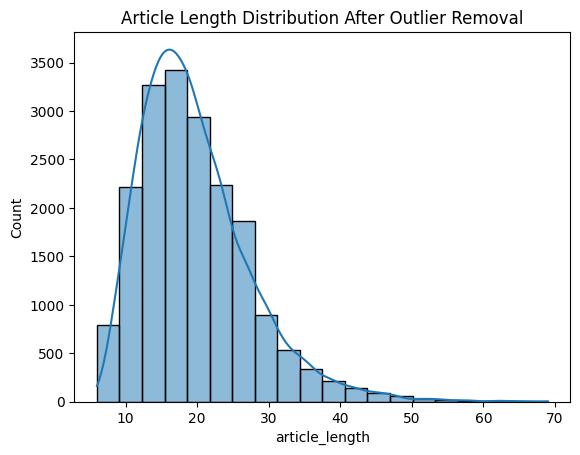

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


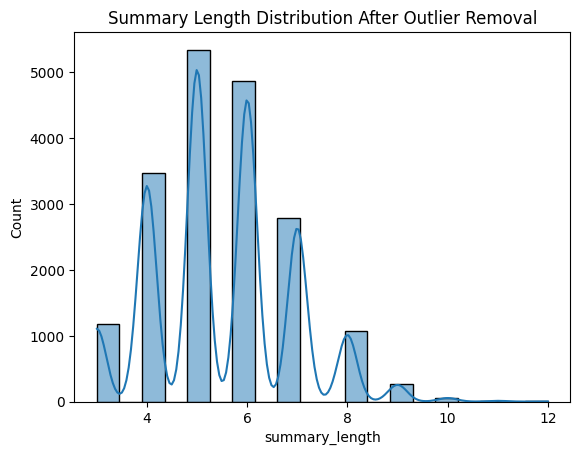

Final dataset shape: (19055, 7)


In [16]:
# Check for missing values and basic information
df_final.info()

# Add new columns for article and summary lengths
df_final['article_length'] = df_final['article'].apply(lambda x: len(x.split()))
df_final['summary_length'] = df_final['summary'].apply(lambda x: len(x.split()))

# Check basic statistics
print(f"Average article length: {df_final['article_length'].mean()}")
print(f"Average summary length: {df_final['summary_length'].mean()}")

# Visualize the distribution of article and summary lengths
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df_final['article_length'], bins=20, kde=True)
plt.title("Article Length Distribution After Outlier Removal")
plt.show()

sns.histplot(df_final['summary_length'], bins=20, kde=True)
plt.title("Summary Length Distribution After Outlier Removal")
plt.show()
print(f"Final dataset shape: {df_final.shape}")


# Preprocessing the Dataset for Fine-Tuning - Indic-Bert
### Preprocess the Text Data


In [17]:
# from transformers import AutoModel, AutoTokenizer

# tokenizer = AutoTokenizer.from_pretrained('ai4bharat/indic-bert')


# # Define a preprocessing function
# def preprocess(text):
#     # Convert to lowercase
#     text = text.lower()
#     # Remove special characters
#     text = ''.join([char for char in text if char.isalnum() or char.isspace()])
#     return text

# # Apply preprocessing to the final dataset
# df_final['article'] = df_final['article'].apply(preprocess)
# df_final['summary'] = df_final['summary'].apply(preprocess)

# # Check the first few entries of the preprocessed dataset
# df_final.head()


### Train-Test Split


In [18]:
# from sklearn.model_selection import train_test_split

# # Split the data (80% train, 20% test)
# train_articles, test_articles, train_summaries, test_summaries = train_test_split(
#     df_final['article'].tolist(), df_final['summary'].tolist(), test_size=0.2, random_state=42
# )

# print(f"Training samples: {len(train_articles)}")
# print(f"Testing samples: {len(test_articles)}")


### Tokenization

In [19]:
# # Define maximum sequence lengths
# MAX_SEQ_LENGTH = 512  # For articles
# MAX_SUMMARY_LENGTH = 150  # For summaries

# # Tokenize articles and summaries
# train_encodings = tokenizer(train_articles, truncation=True, padding=True, max_length=MAX_SEQ_LENGTH)
# test_encodings = tokenizer(test_articles, truncation=True, padding=True, max_length=MAX_SEQ_LENGTH)

# # Tokenize summaries (for labels)
# train_labels_encodings = tokenizer(train_summaries, truncation=True, padding=True, max_length=MAX_SUMMARY_LENGTH)
# test_labels_encodings = tokenizer(test_summaries, truncation=True, padding=True, max_length=MAX_SUMMARY_LENGTH)


### Convert the tokenized data into a PyTorch Dataset.



In [20]:
# import torch

# # Custom Dataset class for the news articles
# class NewsDataset(torch.utils.data.Dataset):
#     def __init__(self, encodings, labels):
#         self.encodings = encodings
#         self.labels = labels

#     def __getitem__(self, idx):
#         item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
#         item['labels'] = torch.tensor(self.labels['input_ids'][idx])  # Use input_ids for labels
#         return item

#     def __len__(self):
#         return len(self.labels['input_ids'])

# # Create training and testing datasets
# train_dataset = NewsDataset(train_encodings, train_labels_encodings)
# test_dataset = NewsDataset(test_encodings, test_labels_encodings)


### Set Training Parameters && Create a DataLoader for batching the data during training.

In [21]:
# # Training parameters
# EPOCHS = 3
# BATCH_SIZE = 8
# LEARNING_RATE = 5e-5

# # DataLoader for training and testing sets
# train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
# test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=BATCH_SIZE)


# Load the pre-trained Indic-BERT model and set up the optimizer.



In [22]:
# from transformers import BertForSequenceClassification, AdamW, get_scheduler
# from transformers import AutoModel, AutoTokenizer

# # Load Indic-BERT model
# # tokenizer = AutoTokenizer.from_pretrained('ai4bharat/indic-bert')

# model = AutoModel.from_pretrained('ai4bharat/indic-bert')

# # Move the model to GPU (if available)
# device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
# model.to(device)

# # Define optimizer and learning rate scheduler
# optimizer = AdamW(model.parameters(), lr=LEARNING_RATE)
# num_training_steps = EPOCHS * len(train_loader)
# lr_scheduler = get_scheduler(name="linear", optimizer=optimizer, num_warmup_steps=0, num_training_steps=num_training_steps)


### Train the model for the specified number of epochs.



In [23]:
# # Training loop
# model.train()

# for epoch in range(EPOCHS):
#     print(f"Epoch {epoch + 1}/{EPOCHS}")
#     total_loss = 0
    
#     for batch in train_loader:
#         batch = {k: v.to(device) for k, v in batch.items()}
        
#         # Forward pass
#         outputs = model(**batch)
#         loss = outputs.loss
#         total_loss += loss.item()
        
#         # Backpropagation
#         loss.backward()
#         optimizer.step()
#         lr_scheduler.step()
#         optimizer.zero_grad()
    
#     avg_loss = total_loss / len(train_loader)
#     print(f"Average training loss for epoch {epoch + 1}: {avg_loss}")


# Evaluation

In [24]:
# model.eval()
# metric = load_metric("rouge")

# for batch in test_loader:
#     batch = {k: v.to(device) for k, v in batch.items()}
#     with torch.no_grad():
#         outputs = model.generate(input_ids=batch['input_ids'], attention_mask=batch['attention_mask'])
    
#     # Decode predictions and references
#     decoded_preds = tokenizer.batch_decode(outputs, skip_special_tokens=True)
#     decoded_labels = tokenizer.batch_decode(batch['labels'], skip_special_tokens=True)
    
#     metric.add_batch(predictions=decoded_preds, references=decoded_labels)

# # Compute ROUGE scores
# final_score = metric.compute()
# print(f"Evaluation Metrics (ROUGE): {final_score}")


# Fine-tuning, training, and evaluating the mBART model using Hugging Face's transformers library.

In [25]:
import torch
from transformers import MBartForConditionalGeneration, MBart50Tokenizer
from sklearn.model_selection import train_test_split
from datasets import Dataset
from transformers import Seq2SeqTrainingArguments, Seq2SeqTrainer
import pandas as pd


In [26]:
# Check the data
print(df_final.head())

                                             article  \
0  স্ট্যান্ডার্ড চার্টার্ড ব্যাংকের নতুন প্রধান ন...   
1  রাজধানী থেকে চামড়া শিল্পগুলো সাভারে স্থানান্তর...   
2  দেশীয় শিল্প বিকাশে সরকারের সব ধরনের উদ্যোগ অব্...   
3  একীভূত হতে চলেছে অনলাইনে শ্রেণিবদ্ধ বিজ্ঞাপন স...   
4  যাত্রীবাহী একটি বাসে আগুন দেওয়ার আধা ঘণ্টার মধ...   

                                             summary  article_word_count  \
0          স্ট্যান্ডার্ড চার্টার্ডের নতুন সিইও আবরার                  13   
1  মার্চের মধ্যে সাভারে চামড়া শিল্পের সিইটিপি: মন...                  19   
2                       ওয়ালটন কারখানায় শিল্পমন্ত্রী                  15   
3                    একীভূত হচ্ছে এখানেই ডটকমওএলএক্স                  13   
4              বাসে আগুন: নড়াইলের পৌর মেয়র গ্রেপ্তার                  25   

   summary_word_count  article_length  summary_length  length_ratio  
0                   5              13               5      2.600000  
1                   7              19               7      2.71428

### Split Data into Training, Validation, and Test Sets

In [27]:
# Split data into train (80%), validation (10%), and test (10%)
train_df, temp_df = train_test_split(df_final, test_size=0.2, random_state=42)
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)

print(f"Train size: {len(train_df)}, Validation size: {len(val_df)}, Test size: {len(test_df)}")


Train size: 15244, Validation size: 1905, Test size: 1906


### Convert Data to Hugging Face Dataset Format


In [28]:
# Convert pandas DataFrame to Hugging Face Dataset object
train_dataset = Dataset.from_pandas(train_df)
val_dataset = Dataset.from_pandas(val_df)
test_dataset = Dataset.from_pandas(test_df)


### Load mBART50 Model and Tokenizer

In [29]:
# Load the tokenizer and model
tokenizer = MBart50Tokenizer.from_pretrained("facebook/mbart-large-50", src_lang="bn_IN", tgt_lang="bn_IN")
model = MBartForConditionalGeneration.from_pretrained("facebook/mbart-large-50")


tokenizer_config.json:   0%|          | 0.00/531 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/649 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.42k [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


pytorch_model.bin:   0%|          | 0.00/2.44G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/261 [00:00<?, ?B/s]

### Tokenization

In [30]:
# Define maximum sequence lengths for articles and summaries
max_input_length = 1024  # mBART has a limit of 1024 tokens
max_target_length = 128

def preprocess_data(examples):
    inputs = [article for article in examples['article']]
    targets = [summary for summary in examples['summary']]
    
    # Tokenize inputs (articles)
    model_inputs = tokenizer(inputs, max_length=max_input_length, truncation=True, padding="max_length")
    
    # Tokenize targets (summaries) as labels
    with tokenizer.as_target_tokenizer():
        labels = tokenizer(targets, max_length=max_target_length, truncation=True, padding="max_length")
    
    model_inputs["labels"] = labels["input_ids"]
    return model_inputs

# Apply the preprocessing function to all datasets
train_dataset = train_dataset.map(preprocess_data, batched=True)
val_dataset = val_dataset.map(preprocess_data, batched=True)
test_dataset = test_dataset.map(preprocess_data, batched=True)


Map:   0%|          | 0/15244 [00:00<?, ? examples/s]

/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:4126: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(


Map:   0%|          | 0/1905 [00:00<?, ? examples/s]

Map:   0%|          | 0/1906 [00:00<?, ? examples/s]

### Define Training Arguments


In [31]:
training_args = Seq2SeqTrainingArguments(
    output_dir="./mbart_bengali_summarization",
    evaluation_strategy="epoch",
    learning_rate=1e-5,
    per_device_train_batch_size=4,
    per_device_eval_batch_size=2,
    weight_decay=0.01,
    save_total_limit=3,
    num_train_epochs=1,
    predict_with_generate=True,
    logging_dir='./logs',
    logging_steps=10,
    save_steps=500,
    eval_steps=500,
    fp16=True  # Enable mixed precision
)


/opt/conda/lib/python3.10/site-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


### Create a Trainer

In [32]:
# Create the Trainer object for fine-tuning
trainer = Seq2SeqTrainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer
)


/opt/conda/lib/python3.10/site-packages/accelerate/accelerator.py:488: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(**kwargs)


In [33]:
import torch
torch.cuda.empty_cache()


### Train the Model


In [34]:
# Fine-tune the model

trainer.train()


Epoch,Training Loss,Validation Loss


OutOfMemoryError: CUDA out of memory. Tried to allocate 490.00 MiB. GPU 0 has a total capacity of 15.89 GiB of which 203.12 MiB is free. Process 2800 has 15.69 GiB memory in use. Of the allocated memory 15.35 GiB is allocated by PyTorch, and 47.75 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)